## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_xmas_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    400.158926
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    400.158926
1    400.171065
2    400.150815
3    400.161799
4    400.169833
5    400.160684
6    400.165239
7    400.155496
8    400.169059
9    400.156700
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    400.161962
dtype: float64

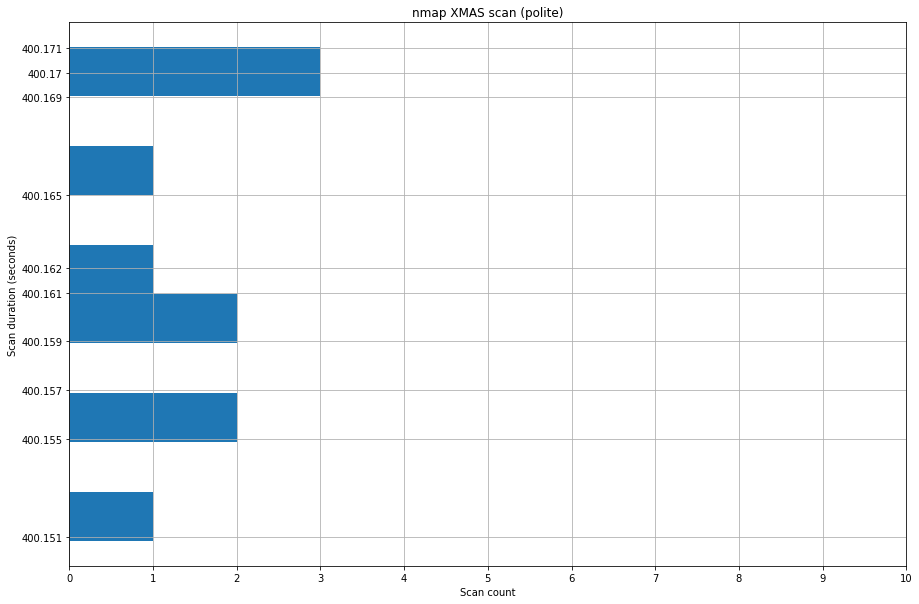

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,400.161962
std,0.006754
min,400.150815
25%,400.157256
50%,400.161242
75%,400.168104
max,400.171065


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 49.979762993649395



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 63875 22
2 63875 1723
3 63875 1025
4 63875 587
5 63875 3306
6 63875 8080
7 63875 993
8 63875 995
9 63875 1720
10 63875 5900
11 63875 23
12 63875 80
13 63875 445
14 63875 110
15 63875 21
16 63875 25
17 63875 3389
18 63875 113
19 63875 139
20 63875 143
21 63875 199
22 63875 53
23 63875 8888
24 63875 554
25 63875 135
26 63875 256
27 63875 111
28 63875 443
29 63875 58080
30 63875 497
31 63875 1217
32 63875 3703
33 63875 2875
34 63875 6003
35 63875 2608
36 63875 1533
37 63875 9040
38 63875 3260
39 63875 9010
40 63875 32782
41 63875 9091
42 63875 1521
43 63875 2500
44 63875 4279
45 63875 2522
46 63875 8089
47 63875 1175
48 63875 26
49 63875 1174
50 63875 2717
51 63875 109
52 63875 1783
53 63875 3324
54 63875 2557
55 63875 16018
56 63875 1119
57 63875 54328
58 63875 5989
59 63875 85
60 63875 6668
61 63875 50500
62 63875 1503
63 63875 9502
64 63875 1755
65 63875 9485
66 63875 9002
67 63875 5225
68 63875 222
69 63875 8291
70 63875 16080
71 63875 1761
72 63875 8443
73 63875 9968
74 63875 49152

624 63875 3325
625 63875 8292
626 63875 5950
627 63875 2068
628 63875 691
629 63875 514
630 63875 1081
631 63875 64623
632 63875 5431
633 63875 6100
634 63875 1277
635 63875 2022
636 63875 2111
637 63875 900
638 63875 9090
639 63875 2042
640 63875 34571
641 63875 7937
642 63875 3283
643 63875 2968
644 63875 16012
645 63875 5998
646 63875 6
647 63875 1070
648 63875 8652
649 63875 5009
650 63875 55055
651 63875 687
652 63875 3689
653 63875 4
654 63875 9998
655 63875 1131
656 63875 2710
657 63875 32771
658 63875 40193
659 63875 1434
660 63875 1048
661 63875 3323
662 63875 3013
663 63875 6004
664 63875 9011
665 63875 1001
666 63875 20000
667 63875 2800
668 63875 648
669 63875 7800
670 63875 2045
671 63875 49155
672 63875 6646
673 63875 1972
674 63875 667
675 63875 15660
676 63875 1199
677 63875 1114
678 63875 6580
679 63875 1039
680 63875 19315
681 63875 8402
682 63875 90
683 63875 1083
684 63875 340
685 63875 1075
686 63875 9081
687 63875 82
688 63875 10616
689 63875 1058
690 63875 1169
6

790 61910 6567
791 61910 32774
792 61910 1040
793 61910 1011
794 61910 406
795 61910 2811
796 61910 264
797 61910 49153
798 61910 1102
799 61910 51103
800 61910 55600
801 61910 726
802 61910 89
803 61910 9207
804 61910 32783
805 61910 15742
806 61910 3880
807 61910 106
808 61910 2288
809 61910 27000
810 61910 9415
811 61910 8500
812 61910 24800
813 61910 6692
814 61910 3367
815 61910 5922
816 61910 9071
817 61910 783
818 61910 3404
819 61910 2222
820 61910 465
821 61910 6000
822 61910 2557
823 61910 6510
824 61910 1082
825 61910 2035
826 61910 7000
827 61910 13
828 61910 1352
829 61910 1084
830 61910 6668
831 61910 5902
832 61910 20828
833 61910 2046
834 61910 8192
835 61910 3800
836 61910 7800
837 61910 16001
838 61910 2251
839 61910 5357
840 61910 12345
841 61910 2068
842 61910 3300
843 61910 64680
844 61910 8008
845 61910 873
846 61910 4446
847 61910 32770
848 61910 5102
849 61910 30718
850 61910 1151
851 61910 56737
852 61910 9002
853 61910 2500
854 61910 1199
855 61910 7103
856 61

457 44467 2119
458 44467 1
459 44467 2967
460 44467 31038
461 44467 1455
462 44467 1031
463 44467 10002
464 44467 545
465 44467 1056
466 44467 1259
467 44467 28201
468 44467 2040
469 44467 417
470 44467 50002
471 44467 3390
472 44467 1272
473 44467 5988
474 44467 6129
475 44467 9500
476 44467 56737
477 44467 50000
478 44467 10617
479 44467 6005
480 44467 9502
481 44467 7000
482 44467 1310
483 44467 1099
484 44467 3889
485 44467 49154
486 44467 49157
487 44467 1026
488 44467 2525
489 44467 1086
490 44467 2043
491 44467 902
492 44467 880
493 44467 5555
494 44467 3878
495 44467 5678
496 44467 15742
497 44467 1067
498 44467 2718
499 44467 1972
500 44467 4224
501 44467 1110
502 44467 1328
503 44467 777
504 44467 89
505 44467 1300
506 44467 1078
507 44467 32768
508 44467 1090
509 44467 1027
510 44467 5910
511 44467 5405
512 44467 5862
513 44467 3871
514 44467 5907
515 44467 2107
516 44467 2800
517 44467 34571
518 44467 9666
519 44467 18988
520 44467 617
521 44467 2288
522 44467 1721
523 4446

123 55325 2710
124 55325 9618
125 55325 1126
126 55325 8090
127 55325 340
128 55325 1063
129 55325 163
130 55325 6
131 55325 4125
132 55325 5221
133 55325 1198
134 55325 89
135 55325 6101
136 55325 5925
137 55325 9917
138 55325 1717
139 55325 2702
140 55325 1057
141 55325 3325
142 55325 14442
143 55325 1058
144 55325 631
145 55325 5101
146 55325 2191
147 55325 8088
148 55325 1091
149 55325 30951
150 55325 1
151 55325 8402
152 55325 1443
153 55325 5280
154 55325 54328
155 55325 10001
156 55325 1098
157 55325 1494
158 55325 2602
159 55325 1062
160 55325 3827
161 55325 15003
162 55325 6106
163 55325 1700
164 55325 18988
165 55325 2065
166 55325 63331
167 55325 32784
168 55325 8200
169 55325 1065
170 55325 4
171 55325 61900
172 55325 4045
173 55325 1201
174 55325 1124
175 55325 24800
176 55325 8087
177 55325 4321
178 55325 1024
179 55325 3690
180 55325 5631
181 55325 3372
182 55325 25735
183 55325 2401
184 55325 2040
185 55325 17
186 55325 10621
187 55325 1145
188 55325 5811
189 55325 1234

790 55325 3006
791 55325 10003
792 55325 5815
793 55325 99
794 55325 4900
795 55325 6567
796 55325 10002
797 55325 3260
798 55325 2608
799 55325 1071
800 55325 1009
801 55325 3784
802 55325 3221
803 55325 8500
804 55325 9878
805 55325 888
806 55325 5678
807 55325 7200
808 55325 49167
809 55325 9102
810 55325 8193
811 55325 8085
812 55325 898
813 55325 5800
814 55325 61532
815 55325 2718
816 55325 222
817 55325 6502
818 55325 9101
819 55325 3527
820 55325 10024
821 55325 1141
822 55325 5009
823 55325 3801
824 55325 912
825 55325 44176
826 55325 1110
827 55325 4279
828 55325 6007
829 55325 5987
830 55325 5060
831 55325 666
832 55325 82
833 55325 1761
834 55325 8899
835 55325 2021
836 55325 1049
837 55325 1077
838 55325 41511
839 55325 1029
840 55325 1113
841 55325 1248
842 55325 49165
843 55325 9290
844 55325 8002
845 55325 6001
846 55325 9100
847 55325 2003
848 55325 27715
849 55325 787
850 55325 2288
851 55325 11967
852 55325 5000
853 55325 8008
854 55325 3920
855 55325 902
856 55325 1

456 54691 1311
457 54691 340
458 54691 406
459 54691 6669
460 54691 22939
461 54691 19283
462 54691 2607
463 54691 711
464 54691 23502
465 54691 5850
466 54691 3301
467 54691 1094
468 54691 65129
469 54691 16001
470 54691 83
471 54691 5120
472 54691 9418
473 54691 7911
474 54691 843
475 54691 648
476 54691 901
477 54691 49157
478 54691 3493
479 54691 1067
480 54691 5030
481 54691 1309
482 54691 16080
483 54691 3006
484 54691 512
485 54691 32769
486 54691 2045
487 54691 5001
488 54691 999
489 54691 2046
490 54691 9929
491 54691 2126
492 54691 1123
493 54691 1042
494 54691 1151
495 54691 3986
496 54691 163
497 54691 32779
498 54691 1093
499 54691 5510
500 54691 7627
501 54691 8383
502 54691 898
503 54691 4129
504 54691 3690
505 54691 50300
506 54691 3128
507 54691 2041
508 54691 32773
509 54691 6580
510 54691 11111
511 54691 40193
512 54691 10621
513 54691 3000
514 54691 3995
515 54691 3390
516 54691 5405
517 54691 444
518 54691 6567
519 54691 990
520 54691 9575
521 54691 6788
522 54691 

123 47185 1029
124 47185 259
125 47185 7100
126 47185 24800
127 47185 5904
128 47185 7627
129 47185 50800
130 47185 888
131 47185 9917
132 47185 9968
133 47185 32771
134 47185 1247
135 47185 1072
136 47185 990
137 47185 10004
138 47185 5998
139 47185 5815
140 47185 9290
141 47185 4000
142 47185 8291
143 47185 10003
144 47185 1141
145 47185 1805
146 47185 2875
147 47185 25735
148 47185 1311
149 47185 1124
150 47185 5859
151 47185 1057
152 47185 5100
153 47185 1935
154 47185 3918
155 47185 808
156 47185 1048
157 47185 32775
158 47185 1081
159 47185 2920
160 47185 9010
161 47185 5566
162 47185 1104
163 47185 8651
164 47185 999
165 47185 1088
166 47185 10009
167 47185 34571
168 47185 49165
169 47185 5000
170 47185 3827
171 47185 6006
172 47185 9876
173 47185 1149
174 47185 64623
175 47185 2179
176 47185 1052
177 47185 54045
178 47185 2170
179 47185 3031
180 47185 5911
181 47185 32772
182 47185 5961
183 47185 2366
184 47185 1152
185 47185 5102
186 47185 5225
187 47185 497
188 47185 5903
189

789 47185 9200
790 47185 464
791 47185 9011
792 47185 42510
793 47185 5190
794 47185 311
795 47185 3971
796 47185 7000
797 47185 2222
798 47185 5033
799 47185 8000
800 47185 17
801 47185 1079
802 47185 64680
803 47185 2725
804 47185 1334
805 47185 15660
806 47185 616
807 47185 5431
808 47185 8333
809 47185 1036
810 47185 6001
811 47185 1076
812 47185 49163
813 47185 7001
814 47185 1862
815 47185 13
816 47185 5003
817 47185 1045
818 47185 1580
819 47185 2042
820 47185 8086
821 47185 1114
822 47185 33
823 47185 2557
824 47185 2008
825 47185 625
826 47185 5850
827 47185 6003
828 47185 2049
829 47185 8082
830 47185 2702
831 47185 7937
832 47185 3766
833 47185 1174
834 47185 1117
835 47185 3369
836 47185 4550
837 47185 161
838 47185 48080
839 47185 1501
840 47185 8300
841 47185 4045
842 47185 992
843 47185 3371
844 47185 32774
845 47185 2383
846 47185 1078
847 47185 563
848 47185 27000
849 47185 8254
850 47185 1119
851 47185 1984
852 47185 10000
853 47185 2022
854 47185 1044
855 47185 3809


456 64193 1029
457 64193 12265
458 64193 20031
459 64193 999
460 64193 19315
461 64193 3
462 64193 1022
463 64193 8022
464 64193 8086
465 64193 5862
466 64193 2047
467 64193 30718
468 64193 10012
469 64193 3322
470 64193 444
471 64193 5298
472 64193 7201
473 64193 32771
474 64193 8008
475 64193 32785
476 64193 2008
477 64193 6389
478 64193 5221
479 64193 5922
480 64193 1236
481 64193 5054
482 64193 3333
483 64193 6788
484 64193 1054
485 64193 4343
486 64193 4550
487 64193 3918
488 64193 2638
489 64193 2020
490 64193 1087
491 64193 64680
492 64193 55600
493 64193 513
494 64193 62078
495 64193 880
496 64193 1104
497 64193 17
498 64193 6
499 64193 3351
500 64193 2002
501 64193 2042
502 64193 38292
503 64193 5678
504 64193 3703
505 64193 1900
506 64193 543
507 64193 1093
508 64193 259
509 64193 9050
510 64193 89
511 64193 2323
512 64193 1038
513 64193 1070
514 64193 52822
515 64193 700
516 64193 56737
517 64193 27356
518 64193 8290
519 64193 340
520 64193 5200
521 64193 9618
522 64193 6190

122 38286 4662
123 38286 5101
124 38286 9415
125 38286 543
126 38286 264
127 38286 32771
128 38286 3261
129 38286 2605
130 38286 27000
131 38286 9917
132 38286 1088
133 38286 19283
134 38286 17877
135 38286 8099
136 38286 1914
137 38286 9040
138 38286 21571
139 38286 11111
140 38286 27355
141 38286 5800
142 38286 749
143 38286 1036
144 38286 33899
145 38286 1066
146 38286 1038
147 38286 9010
148 38286 4279
149 38286 2111
150 38286 2047
151 38286 1074
152 38286 60443
153 38286 50636
154 38286 2043
155 38286 1047
156 38286 50389
157 38286 2381
158 38286 1755
159 38286 2160
160 38286 2288
161 38286 4443
162 38286 3871
163 38286 783
164 38286 20222
165 38286 2323
166 38286 1864
167 38286 5903
168 38286 6788
169 38286 2251
170 38286 18040
171 38286 13782
172 38286 6005
173 38286 6699
174 38286 3221
175 38286 32782
176 38286 625
177 38286 515
178 38286 5859
179 38286 1132
180 38286 9418
181 38286 1110
182 38286 777
183 38286 1079
184 38286 8400
185 38286 1022
186 38286 13783
187 38286 1099
1

789 38286 146
790 38286 1130
791 38286 1123
792 38286 3168
793 38286 144
794 38286 255
795 38286 7920
796 38286 6009
797 38286 5906
798 38286 1580
799 38286 2035
800 38286 2001
801 38286 987
802 38286 5952
803 38286 1147
804 38286 60020
805 38286 1007
806 38286 1999
807 38286 1092
808 38286 6
809 38286 1033
810 38286 2007
811 38286 6002
812 38286 8649
813 38286 100
814 38286 10003
815 38286 5080
816 38286 1081
817 38286 8443
818 38286 4900
819 38286 2065
820 38286 1070
821 38286 6006
822 38286 27356
823 38286 32784
824 38286 1
825 38286 6101
826 38286 1271
827 38286 5718
828 38286 1455
829 38286 301
830 38286 9099
831 38286 42
832 38286 3827
833 38286 16001
834 38286 3369
835 38286 1051
836 38286 3551
837 38286 10621
838 38286 6004
839 38286 2301
840 38286 8290
841 38286 20
842 38286 2401
843 38286 49158
844 38286 28201
845 38286 3000
846 38286 9090
847 38286 14000
848 38286 2000
849 38286 5877
850 38286 1521
851 38286 3546
852 38286 1035
853 38286 1029
854 38286 1065
855 38286 880
856

455 62245 9207
456 62245 3322
457 62245 2525
458 62245 259
459 62245 5102
460 62245 8899
461 62245 1046
462 62245 4005
463 62245 497
464 62245 1043
465 62245 1334
466 62245 5906
467 62245 6565
468 62245 10010
469 62245 50389
470 62245 4242
471 62245 49161
472 62245 5901
473 62245 9943
474 62245 2251
475 62245 32776
476 62245 5060
477 62245 911
478 62245 6002
479 62245 1148
480 62245 9290
481 62245 1658
482 62245 5963
483 62245 3784
484 62245 10180
485 62245 2200
486 62245 15004
487 62245 1310
488 62245 9666
489 62245 6667
490 62245 8002
491 62245 38292
492 62245 1119
493 62245 7625
494 62245 3809
495 62245 2049
496 62245 49167
497 62245 1812
498 62245 32782
499 62245 648
500 62245 16018
501 62245 873
502 62245 8292
503 62245 25734
504 62245 10778
505 62245 3006
506 62245 49156
507 62245 11111
508 62245 3367
509 62245 2381
510 62245 3351
511 62245 1174
512 62245 20031
513 62245 2702
514 62245 33354
515 62245 2030
516 62245 720
517 62245 27715
518 62245 16001
519 62245 18101
520 62245 54

122 35546 7627
123 35546 52848
124 35546 3737
125 35546 11110
126 35546 65389
127 35546 524
128 35546 5911
129 35546 3971
130 35546 14000
131 35546 4343
132 35546 3322
133 35546 212
134 35546 5500
135 35546 1044
136 35546 1072
137 35546 5825
138 35546 5555
139 35546 9593
140 35546 8093
141 35546 1183
142 35546 50389
143 35546 1106
144 35546 6106
145 35546 4125
146 35546 49156
147 35546 5679
148 35546 1417
149 35546 64680
150 35546 6646
151 35546 801
152 35546 81
153 35546 2103
154 35546 5120
155 35546 1783
156 35546 1058
157 35546 8181
158 35546 9050
159 35546 32769
160 35546 720
161 35546 1666
162 35546 1233
163 35546 8031
164 35546 3351
165 35546 32777
166 35546 407
167 35546 1037
168 35546 301
169 35546 10001
170 35546 5960
171 35546 2601
172 35546 32781
173 35546 10000
174 35546 1185
175 35546 17
176 35546 9003
177 35546 1104
178 35546 6510
179 35546 3703
180 35546 2701
181 35546 49157
182 35546 2020
183 35546 40193
184 35546 1023
185 35546 1147
186 35546 1062
187 35546 9
188 35546

788 35546 1055
789 35546 1033
790 35546 27353
791 35546 55055
792 35546 18988
793 35546 7741
794 35546 24444
795 35546 144
796 35546 425
797 35546 3390
798 35546 2967
799 35546 5810
800 35546 2605
801 35546 20031
802 35546 2222
803 35546 1065
804 35546 3517
805 35546 17988
806 35546 2607
807 35546 5902
808 35546 32775
809 35546 9101
810 35546 8086
811 35546 2111
812 35546 4550
813 35546 41511
814 35546 50000
815 35546 30951
816 35546 1066
817 35546 63331
818 35546 7800
819 35546 1047
820 35546 27000
821 35546 7999
822 35546 6006
823 35546 1091
824 35546 2875
825 35546 3013
826 35546 1029
827 35546 9071
828 35546 10009
829 35546 1455
830 35546 56738
831 35546 4006
832 35546 44176
833 35546 12174
834 35546 6901
835 35546 44443
836 35546 900
837 35546 12000
838 35546 3851
839 35546 1719
840 35546 5998
841 35546 9103
842 35546 32774
843 35546 3325
844 35546 1148
845 35546 3809
846 35546 2008
847 35546 5901
848 35546 1201
849 35546 5000
850 35546 9010
851 35546 1031
852 35546 6779
853 35546

In [14]:
orders_port

,scannr,sport,dport
0,1,63875,22
1,2,63875,1723
2,3,63875,1025
3,4,63875,587
4,5,63875,3306
...,...,...,...
9995,996,35546,12265
9996,997,35546,1048
9997,998,35546,2393
9998,999,35546,3878


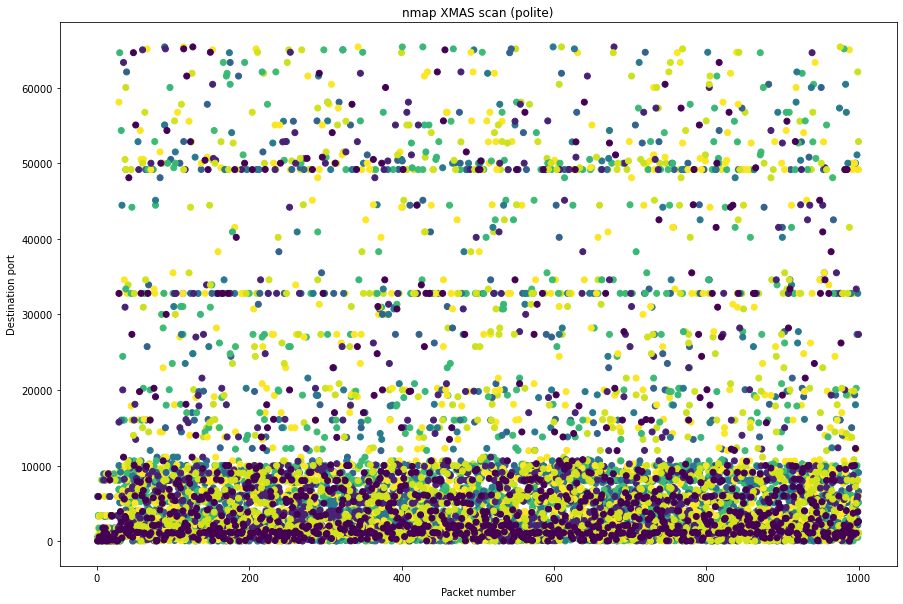

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

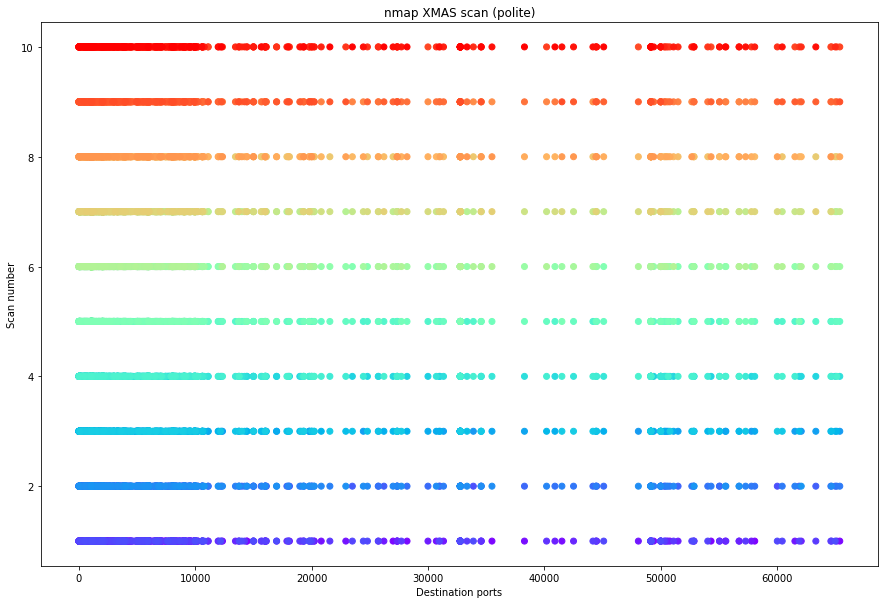

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

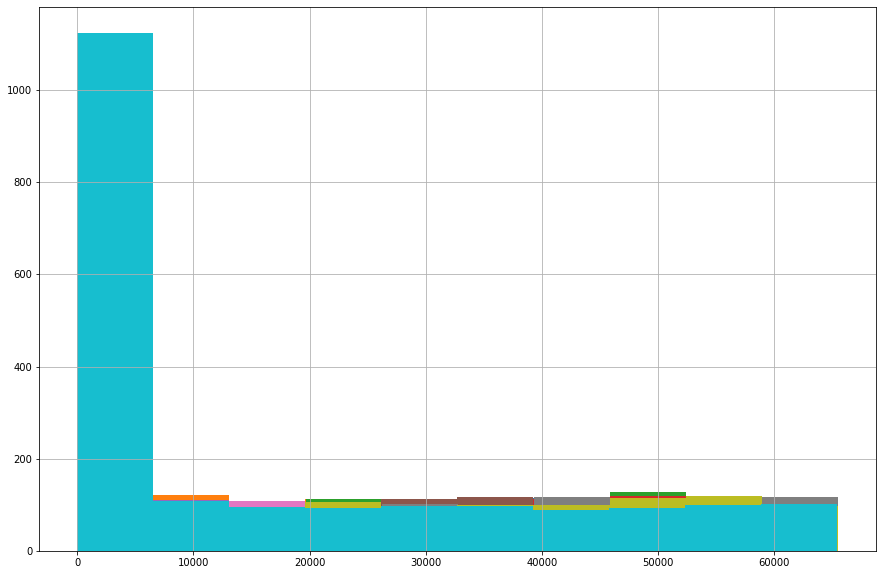

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

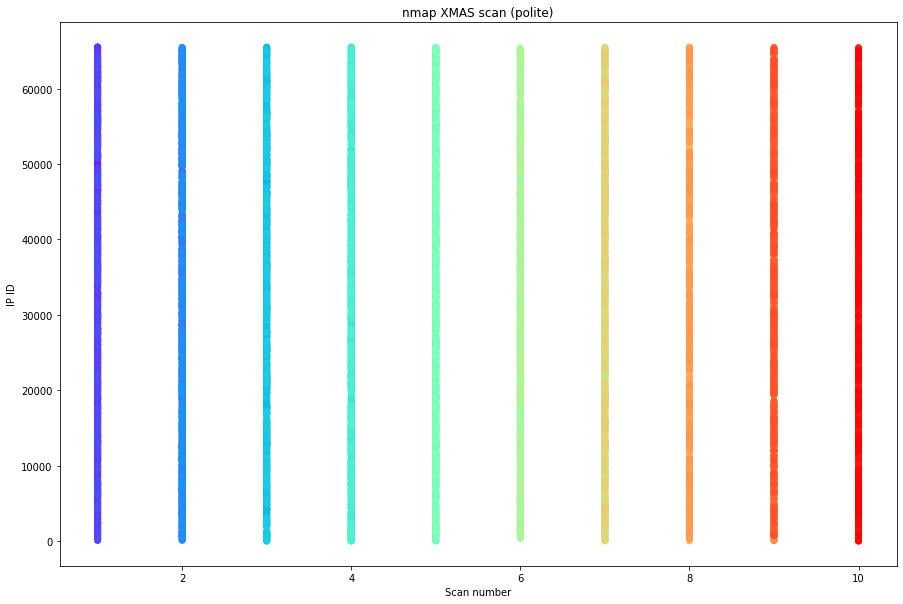

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


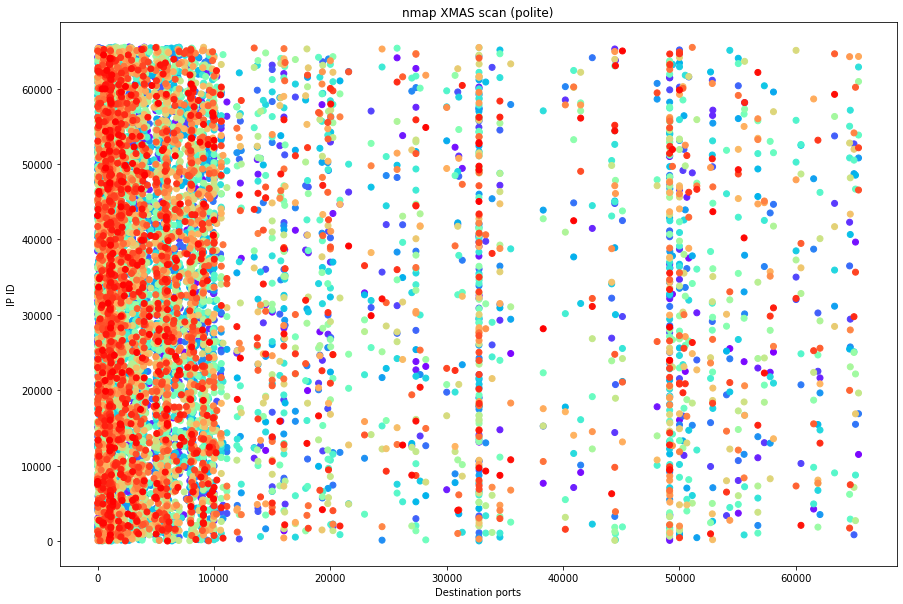

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

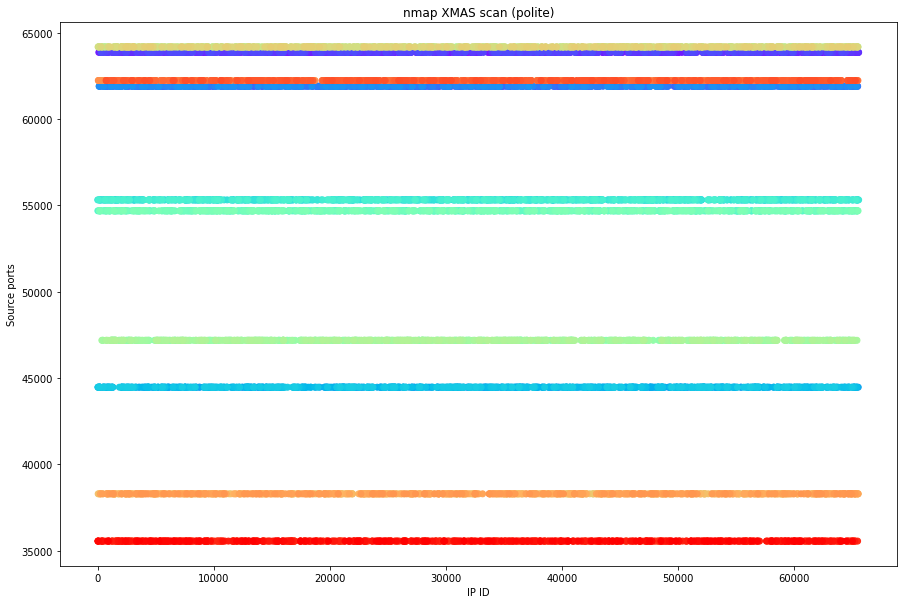

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 2749575885
Sequence number: 274

Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 356

Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 3568457662
Sequence number: 356

Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 201

Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 2012167198
Sequence number: 201

Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 291

Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 2918768582
Sequence number: 291

Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 113

Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 1132214110
Sequence number: 113

Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 1018334053
Sequence number: 101

Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 3880666669
Sequence number: 388

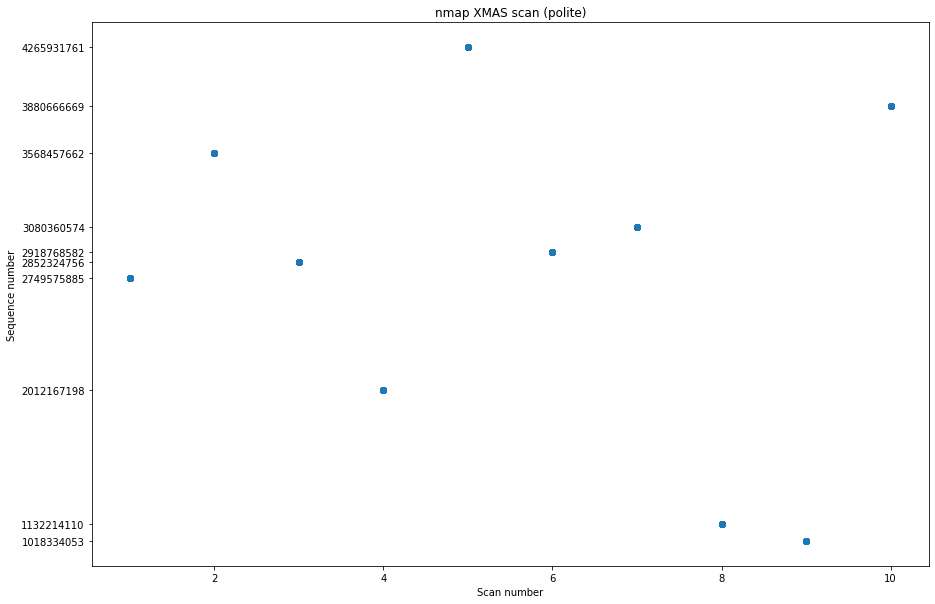

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


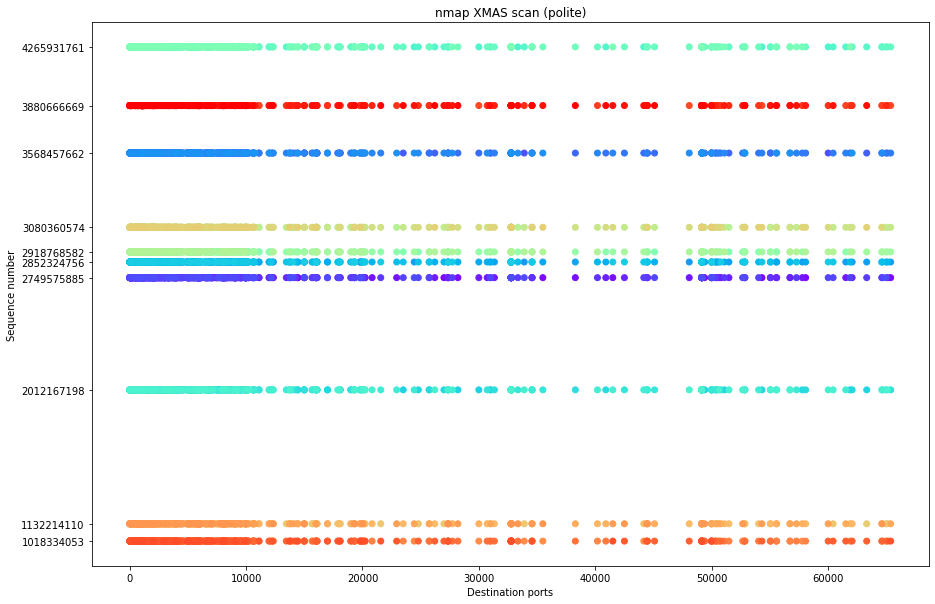

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

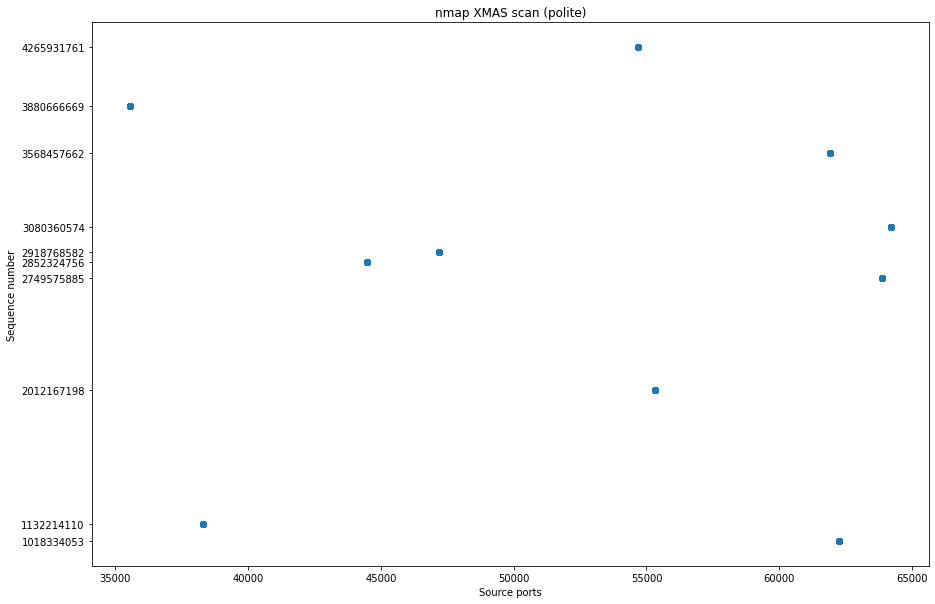

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

10

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU